# Wavelet Transform
1. Discrete Wavelet Transform
2. Stationary Wavelet Transform
3. Continuous Wavelet Transform

Find out wavelet familes: [here](http://wavelets.pybytes.com/wavelet/sym7/)


## Import files

In [1]:
import pickle
import sys
base_dir = '/content/drive/MyDrive/Programming/CreativeProject/3_ecg/data_pkl/'
sys.path.append(base_dir)

from dataset import Dataset_ECG
with open(base_dir+'test_data.pkl', 'rb') as f:
    test_data = pickle.load(f)
with open(base_dir+'train_data.pkl', 'rb') as f:
    train_data = pickle.load(f)

In [1]:
import pickle
base_dir = '/content/drive/MyDrive/Programming/CreativeProject/3_ecg/data/'
with open(base_dir+'test_preprocessed_dict_500.pkl', 'rb') as f:
    test_data = pickle.load(f)
with open(base_dir+'train_preprocessed_dict_500.pkl', 'rb') as f:
    train_data = pickle.load(f)

## Import libraries for wavelet

In [2]:
import pywt
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc

import matplotlib as mpl
import matplotlib.cm as cm
import os
from PIL import Image
from skimage.transform import resize
from datetime import datetime

plt.rcParams['figure.figsize'] = (18, 5)
plt.rcParams['axes.grid'] = False

DIR = '/content/drive/MyDrive/Programming/CreativeProject/3_ecg/'

In [3]:
from scipy.signal import find_peaks, argrelextrema, find_peaks_cwt

In [4]:
sys.path.append(DIR+'py-bwr/')
import bwr

In [21]:
import warnings
warnings.filterwarnings("error")

## Make id-label dataframe

In [5]:
col = ['label_'+str(i) for i in range(12)]
df_train = pd.DataFrame(train_data.list_labels_oh, columns=col)
df_train['id'] = train_data.list_id

## Remove baseline wander: py-bwr
reference: https://github.com/spebern/py-bwr

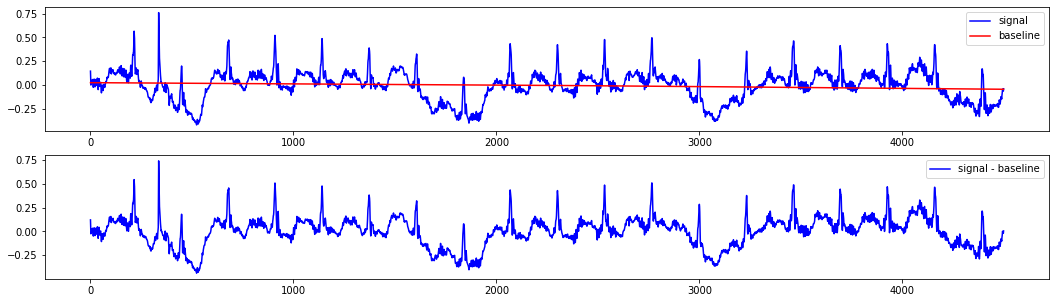

['1', '3']


In [97]:
idx = 5830
signal = test_data.list_recording[idx][1][TRIM:-TRIM]
baseline = bwr.calc_baseline(signal)

# Remove baseline from orgianl signal
ecg_out = signal - baseline

plt.subplot(2, 1, 1)
plt.plot(signal, "b-", label="signal")
plt.plot(baseline, "r-", label="baseline")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(ecg_out, "b-", label="signal - baseline")
plt.legend()
plt.show()
print(train_data.list_labels[idx])

In [95]:
idx = 5830
x0 = test_data.list_recording[idx][0][TRIM:-TRIM]
x0 = x0 - baseline
x0 = x0
x1 = test_data.list_recording[idx][1][TRIM:-TRIM]
x1 = x1 - baseline
x1 = x1
test_recording_new[idx] = [x0, x1]

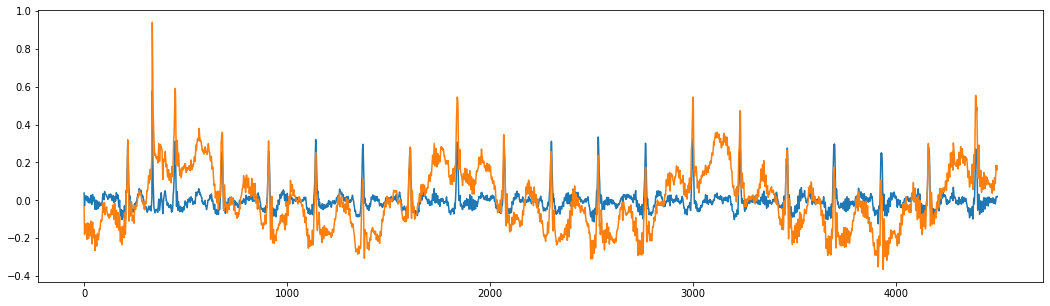

In [96]:
plt.plot(test_recording_new[idx][0])
plt.plot(test_recording_new[idx][1])
plt.show()

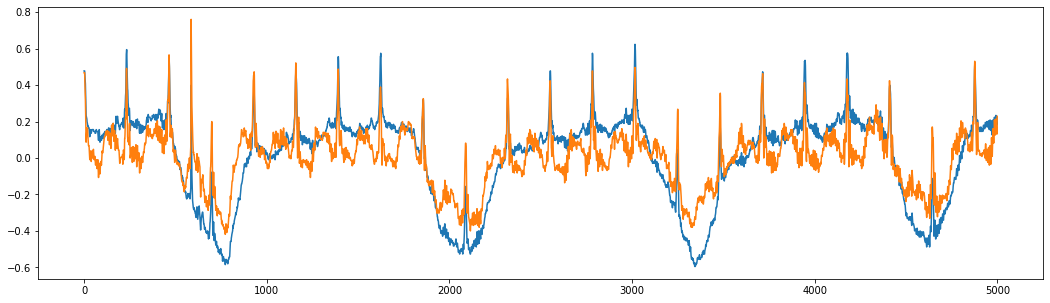

In [98]:
plt.plot(test_data.list_recording[idx][0])
plt.plot(test_data.list_recording[idx][1])
plt.show()

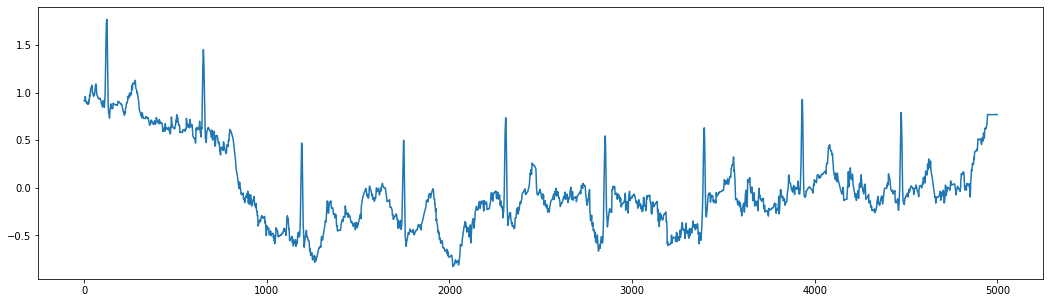

In [82]:
idx = 16933
plt.plot(train_data.list_recording[idx][0])
plt.show()
# print(train_data.list_labels[idx])

In [7]:
def remove_bw_bwr(signal):
    baseline = bwr.calc_baseline(signal)
    return signal-baseline

In [66]:
TRIM = 250

In [67]:
train_recording_new = [[]]*len(train_data)
print('TRAIN DATA')
for i in range(len(train_data)):
    try:
        signal_tu = train_data.list_recording[i]
        x0 = remove_bw_bwr(signal_tu[0][TRIM:-TRIM])
        x1 = remove_bw_bwr(signal_tu[1][TRIM:-TRIM])
        train_recording_new[i] = [x0, x1]
        if i%1000 == 0:
            print(f'[{i}/{len(train_data)}]')
    except RuntimeWarning:
        print(f'!!Runtime warning at: {i} !!')

print('TEST DATA')
test_recording_new = [[]]*len(test_data)
for i in range(len(test_data)):
    try:
        signal_tu = test_data.list_recording[i]
        x0 = remove_bw_bwr(signal_tu[0][TRIM:-TRIM])
        x1 = remove_bw_bwr(signal_tu[1][TRIM:-TRIM])
        test_recording_new[i] = [x0, x1]
        if i%1000 == 0:
            print(f'[{i}/{len(train_data)}]')
    except RuntimeWarning:
        print(i)
        print(f'!!Runtime warning at: {i} !!')

TRAIN DATA
[0/19212]
[1000/19212]
[2000/19212]
[3000/19212]
[4000/19212]
[5000/19212]
[6000/19212]
[7000/19212]
[8000/19212]
[9000/19212]
[10000/19212]
[11000/19212]
[12000/19212]
[13000/19212]
[14000/19212]
[15000/19212]
[16000/19212]
!!Runtime warning at: 16933 !!
[17000/19212]
[18000/19212]
[19000/19212]
TEST DATA
[0/19212]
[1000/19212]
[2000/19212]
[3000/19212]
[4000/19212]
[5000/19212]
[6000/19212]
[7000/19212]


In [99]:
for i in range(len(train_data)):
    if train_recording_new[i] == []:
        print(i)

In [100]:
print('Errors in test data')
for i in range(len(test_data)):
    if test_recording_new[i] == []:
        print(i)

Errors in test data


In [102]:
train_dict = {
    'recording': train_recording_new,
    'id': train_data.list_id,
    'age': train_data.list_age,
    'sex': train_data.list_sex,
    'labels': train_data.list_labels_oh
}
test_dict = {
    'recording': test_recording_new,
    'id': test_data.list_id,
    'age': test_data.list_age,
    'sex': test_data.list_sex,
}

In [103]:
with open(DIR+'data/train_preprocessed_dict.pkl', 'wb') as f:
    pickle.dump(train_dict, f, pickle.HIGHEST_PROTOCOL)
with open(DIR+'data/test_preprocessed_dict.pkl', 'wb') as f:
    pickle.dump(test_dict, f, pickle.HIGHEST_PROTOCOL)

## DWT

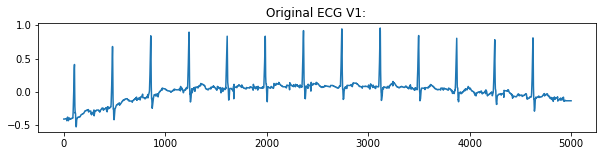

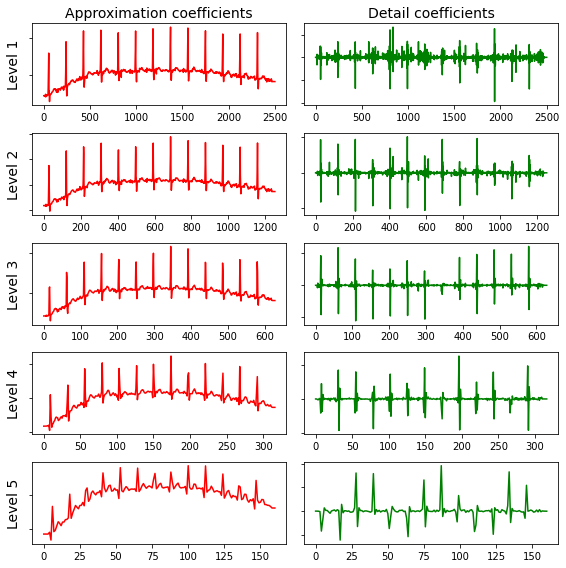

In [10]:
ecg_signal = train_data.list_recording[0][1]
    
fig, ax = plt.subplots(figsize=(10,2))
ax.set_title("Original ECG V1: ")
ax.plot(ecg_signal)
plt.show()
    
data = ecg_signal
waveletname = 'db3'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(8,8))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

## SWT

In [44]:
ecg_signal = train_data['recording'][8146][1]
   
data = ecg_signal
waveletname = 'db3'
level = 2
coeffs = pywt.swt(data, wavelet=waveletname, level=level)
print(coeffs)
print(np.array(coeffs).shape)

[(array([-0.03899185, -0.0526534 , -0.07852655, ..., -0.05676226,
       -0.04600781, -0.03528582]), array([-0.00100141,  0.00728575,  0.01063714, ..., -0.02861902,
       -0.02886044, -0.00991468])), (array([-0.04797687, -0.09167263, -0.10659669, ..., -0.036267  ,
       -0.03086543, -0.02237097]), array([ 8.42354004e-03, -7.79752490e-05, -7.93034541e-04, ...,
        1.95156555e-02, -2.82032204e-02,  1.82641358e-04]))]
(2, 2, 4500)


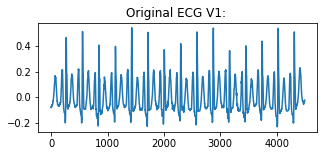

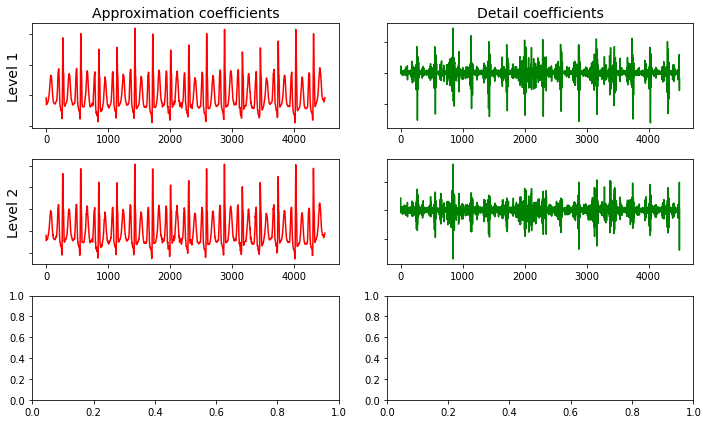

In [45]:
fig, ax = plt.subplots(figsize=(5,2))
ax.set_title("Original ECG V1: ")
ax.plot(ecg_signal)
plt.show()
 
fig, axarr = plt.subplots(nrows=3, ncols=2, figsize=(10,6))
for ii in range(level):
    axarr[ii, 0].plot(coeffs[ii][0], 'r')
    axarr[ii, 1].plot(coeffs[ii][1], 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

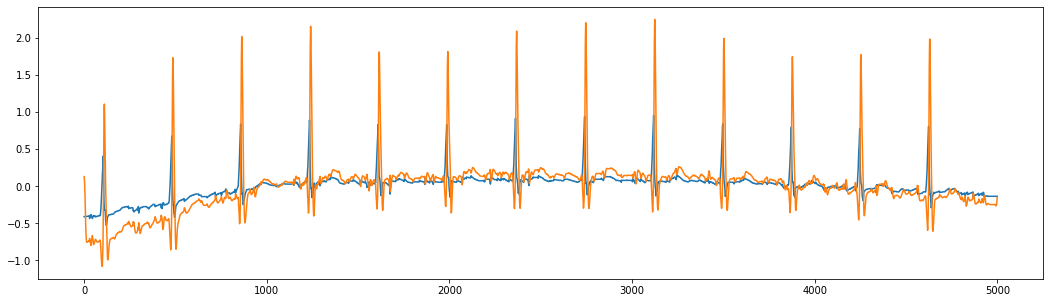

In [10]:
plt.plot(data)
plt.plot(coeffs[0][0]-data)
plt.show()

## CWT, save file

In [17]:
rescale_size=200
cwt_scale = 300
wavelet = 'morl'
cmap = cm.hsv

tot_size = len(train_data['id'])

cwt_rgb = np.ndarray((tot_size, 2, rescale_size, rescale_size, 3))
mapped = np.ndarray((rescale_size, rescale_size, 3))

start = datetime.now()
for idx in range(tot_size):
    for l in range(2):
        signal = train_data['recording'][idx][l]
        coeffs, freqs = pywt.cwt(signal, scales = np.arange(1, cwt_scale+1), wavelet = wavelet)
        rescale_coeffs = resize(coeffs, (rescale_size, rescale_size), mode = 'constant')

        # sig_min = rescale_coeffs.min()
        # sig_max = rescale_coeffs.max()

        rescale_coeffs -= rescale_coeffs.min()
        rescale_coeffs /= rescale_coeffs.max()
        # norm = mpl.colors.Normalize(vmin=sig_min, vmax=sig_max)
        
#         for i in range(rescale_size):
#             mapped[i] = np.array([cmap(norm(n))[:3] for n in rescale_coeffs[i]])
        # m = cm.ScalarMappable(norm=norm, cmap=cmap)
#         mapped = m.to_rgba(rescale_coeffs)[:, :, :3]
        cwt_rgb[idx, l] = cmap(rescale_coeffs)[:, :, :3] #mapped
    if idx%1800==0:
        print(f'Now: {idx}')
        print(f'Time consummed: {datetime.now()-start}\n')

Now: 0
Time consummed: 0:00:00.264390



KeyboardInterrupt: ignored

In [18]:
len(train_data['id'])

172908

In [14]:
from skimage.transform import resize

def create_cwt_images(X, n_scales, rescale_size, wavelet_name = "gaus1"):
    n_samples = X.shape[0] 
    n_signals = X.shape[2] 
    
    # range of scales from 1 to n_scales
    scales = np.arange(1, n_scales + 1) 
    
    # pre allocate array
    X_cwt = np.ndarray(shape=(n_samples, rescale_size, rescale_size, n_signals), dtype = 'float32')
    
    for sample in range(n_samples):
        if sample % 1000 == 0:
            print(sample)
        for signal in range(n_signals):
            serie = X[sample, :, signal]
            # continuous wavelet transform 
            coeffs, freqs = pywt.cwt(serie, scales, wavelet_name)
            # resize the 2D cwt coeffs
            rescale_coeffs = resize(coeffs, (rescale_size, rescale_size), mode = 'constant')
            X_cwt[sample,:,:,signal] = rescale_coeffs
            
    return X_cwt

In [15]:
# amount of pixels in X and Y 
rescale_size = 200
# determine the max scale size
n_scales = 150

In [16]:
X_train = np.array(train_data['recording'])
X_train = np.transpose(X_train, (0, 2, 1))
X_test = np.array(test_data['recording'])
X_test = np.transpose(X_test, (0, 2, 1))

In [17]:
X_train_cwt = create_cwt_images(X_train, n_scales, rescale_size, wavelet_name='morl')
print(f"shapes (n_samples, x_img, y_img, z_img) of X_train_cwt: {X_train_cwt.shape}")
X_test_cwt = create_cwt_images(X_test, n_scales, rescale_size, wavelet_name='morl')
print(f"shapes (n_samples, x_img, y_img, z_img) of X_test_cwt: {X_test_cwt.shape}")

0
1000
2000
3000
4000
5000


KeyboardInterrupt: ignored

In [ ]:
train_dict = {
    'record_2d': X_train_cwt,
    'id': train_data.list_id
    'age': train_data.list_age,
    'sex': train_data.list_sex,
    'labels': train_data.list_labels_oh
}
test_dict = {
    'record_2d': X_test_cwt,
    'id': test_data.list_id
    'age': test_data.list_age,
    'sex': test_data.list_sex,
}

## CWT

In [6]:
def find_pure_label(label='label_0', order=1):
    cnt = 0
    for i in range(len(df_train)):
        if sum(df_train.iloc[i, :-1])==1 and df_train.loc[i, label]==1:
            cnt += 1
            if cnt == order:
                return i

In [7]:
def minmax_scale(signal):
    signal -= signal.min()
    signal /= signal.max()
    return signal

In [367]:
def cwt_plot(scale, wavelet, signal=None, label=None, order=1):
    if label is not None:
        ecg_idx = find_pure_label(label, order)
        # n_ecg = 1 if V1 else 0
        print(train_data.list_labels[ecg_idx])
        signal_tu = train_data.list_recording[ecg_idx] 
    else:
        signal_tu =  signal
    # create scalogram
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    fig2, ax2 = plt.subplots(nrows=2, ncols=1, figsize = (10, 3))
    for i in range(2):
        signal_ = signal_tu[i]
        ax2[i].plot(signal_)
        ax2[i].set_ylabel(f'Lead{i+1}')

        coeffs, freqs = pywt.cwt(signal_, scales = scale, wavelet = wavelet)
        ax[i].imshow(coeffs, cmap = 'coolwarm', aspect = 'auto')
        title = f"Lead{i+1}"# f"[id {train_data.list_id[ecg_idx]}]  "+label+f" / Lead{i+1}"
        ax[i].set_title(title)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].set_ylabel('Scale')
        ax[i].set_xlabel('Time')
    plt.tight_layout()

In [67]:
def cwt_plot_small(idx, scale, wavelet, rescale_size=200, cmap='coolwarm'):
    fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(12,6))
    for i in range(9):
        row = int(i/3)
        col = int(i%3)*2
        for lead in range(2):
            signal = train_data['recording'][idx+i][lead]
            coeffs, freqs = pywt.cwt(signal, scales = scale, wavelet = wavelet)
            rescale_coeffs = resize(coeffs, (rescale_size, rescale_size), mode = 'constant')
            ax[row][col+lead].imshow(rescale_coeffs, cmap = cmap, aspect = 'auto')
            ax[row][col+lead].set_title(f"lead {lead+1}")
            ax[row][col+lead].spines['right'].set_visible(False)
            ax[row][col+lead].spines['top'].set_visible(False)
            # ax.set_ylabel('Scale')
            # ax.set_xlabel('Time')
    fig.savefig(DIR+'test.png', dpi=200, format='png')
    plt.tight_layout()

In [59]:
train_data['id'][414:432].index()

TypeError: ignored

In [98]:
import os
my_dir = os.path.join(base_dir, 'cwt_figs')
os.mkdir(my_dir)

im_size = 200
my_dpi = 96

fig = plt.figure(frameon=False)
fig.set_size_inches(im_size/my_dpi, im_size/my_dpi)

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

for i in range(0, len(train_data['id']), 9):
    id_dir = os.path.join(my_dir, str(train_data['id'][i]))
    os.mkdir(id_dir)
    for lead in range(2):
        title_lead = f"lead{lead+1}"
        for j in range(9):
            title = f "{title_lead}_{j}.jpg"
            signal = train_data['recording'][i+j][lead]
            coeffs, freqs = pywt.cwt(signal, scales = np.arange(1, 300), wavelet = 'morl')
            rescale_coeffs = resize(coeffs, (rescale_size, rescale_size), mode = 'constant')
            ax.imshow(rescale_coeffs, cmap = 'hsv', aspect = 'auto')
            fig.savefig(id_dir+'/'+title, dpi=my_dpi, format='jpg')
    if i%1800==0:
        print(f"saved {i} images...")

saved 0 images...


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f839403e440> (for post_execute):


KeyboardInterrupt: ignored

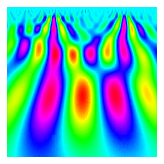

In [93]:
signal = train_data['recording'][idx+1][1]
coeffs, freqs = pywt.cwt(signal, scales = np.arange(1, 300), wavelet = 'morl')
rescale_coeffs = resize(coeffs, (rescale_size, rescale_size), mode = 'constant')

im_size = 200
my_dpi = 96
fig = plt.figure(frameon=False)
fig.set_size_inches(im_size/my_dpi, im_size/my_dpi)

ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(rescale_coeffs, cmap = 'hsv', aspect = 'auto')
fig.savefig(DIR+'test.jpg', dpi=my_dpi, format='jpg')

# plt.figure(figsize=(im_size/my_dpi, im_size/my_dpi), dpi=
# plt.imshow(rescale_coeffs, cmap = 'hsv', aspect = 'auto')
# plt.savefig(DIR+'test.png', dpi=200, format='png', bbox_inches='tight', pad_inches=0)my_dpi, frameon=False)

In [89]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open(DIR+'test.jpg')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(200, 200, 3)
<class 'PIL.Image.Image'>
RGB
(200, 200)


1812
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


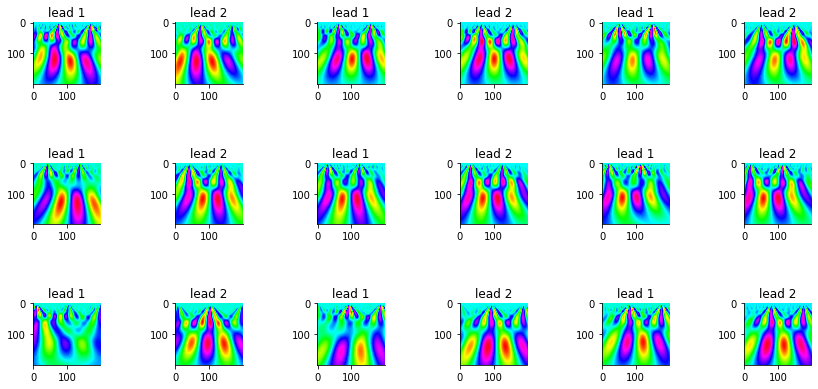

In [68]:
lab = 0
for label in train_data['labels']:
    if label[lab]==1:
        idx = train_data['labels'].index(label)
        break
# id = 9110
# idx = train_data['id'].index(id)
# lead = 0
cwt_plot_small(idx, np.arange(1, 300), 'morl', cmap='hsv')
print(train_data['id'][idx])
print(train_data['labels'][idx])

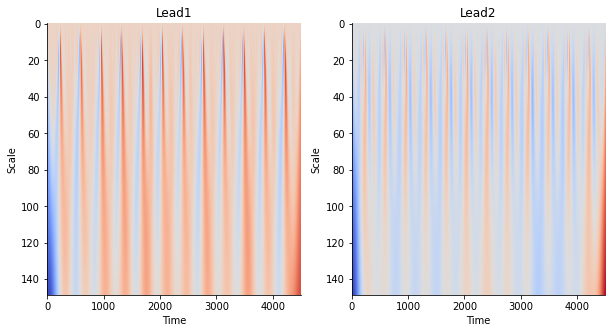

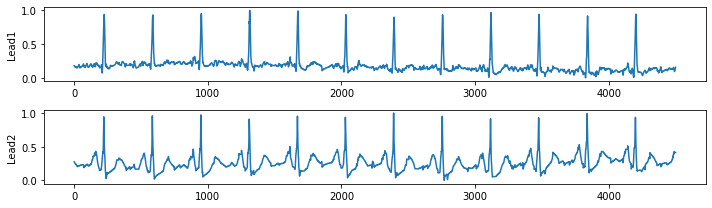

In [370]:
idx = df_train[df_train['id']==1711].index[0]
signal = train_data.list_recording_new[idx]
cwt_plot(np.arange(1, 150), 'gaus1', signal=signal)

In [ ]:
idx[0]

['11']


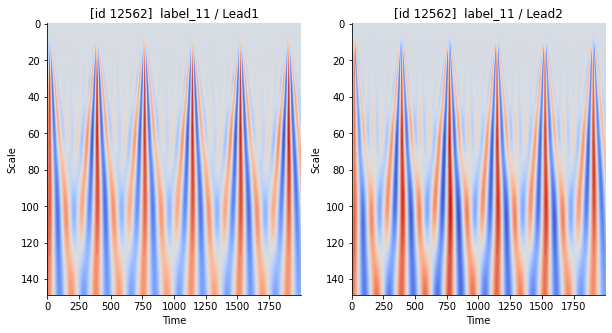

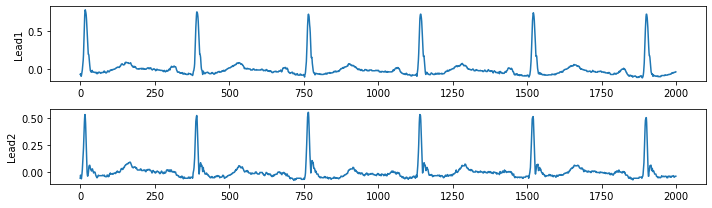

In [9]:
cwt_plot(np.arange(1, 150), 'morl', label='label_11', order=4)

['8']


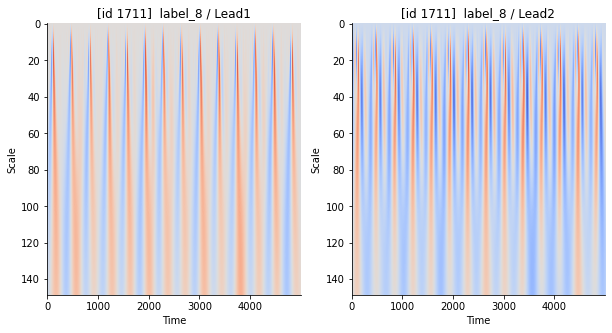

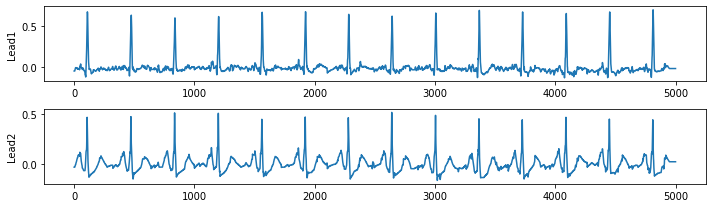

In [186]:
cwt_plot(np.arange(1, 150), 'gaus1', label='label_8', order=1)

In [11]:
def cwt_plot_500(wavelet='morl', scale=np.arange(1, 150), signal=None, label=None, order=1):
    if label is not None:
        ecg_idx = find_pure_label(label, order)
        # n_ecg = 1 if V1 else 0
        print(train_data.list_labels[ecg_idx])
    
    # create scalogram
    fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(10,20))
    fig2, ax2 = plt.subplots(nrows=2, ncols=1, figsize = (10, 3))
    for i in range(2):
        signal = train_data.list_recording[ecg_idx][i]
        ax2[i].plot(signal)
        ax2[i].set_ylabel(f'Lead{i+1}')
        for j in range(10):
            sub_signal = signal[j*500:(j+1)*500]
            coeffs, freqs = pywt.cwt(sub_signal, scales = scale, wavelet = wavelet)
            ax[j][i].imshow(coeffs, cmap = 'coolwarm', aspect = 'auto')
            ax[j][i].spines['right'].set_visible(False)
            ax[j][i].spines['top'].set_visible(False)
            ax[j][i].set_ylabel('Scale')
            ax[j][i].set_xlabel('Time')
        title = f"[id {train_data.list_id[ecg_idx]}]  "+label+f" / Lead{i+1}"
        ax[0][i].set_title(title)
    plt.tight_layout()

['11']


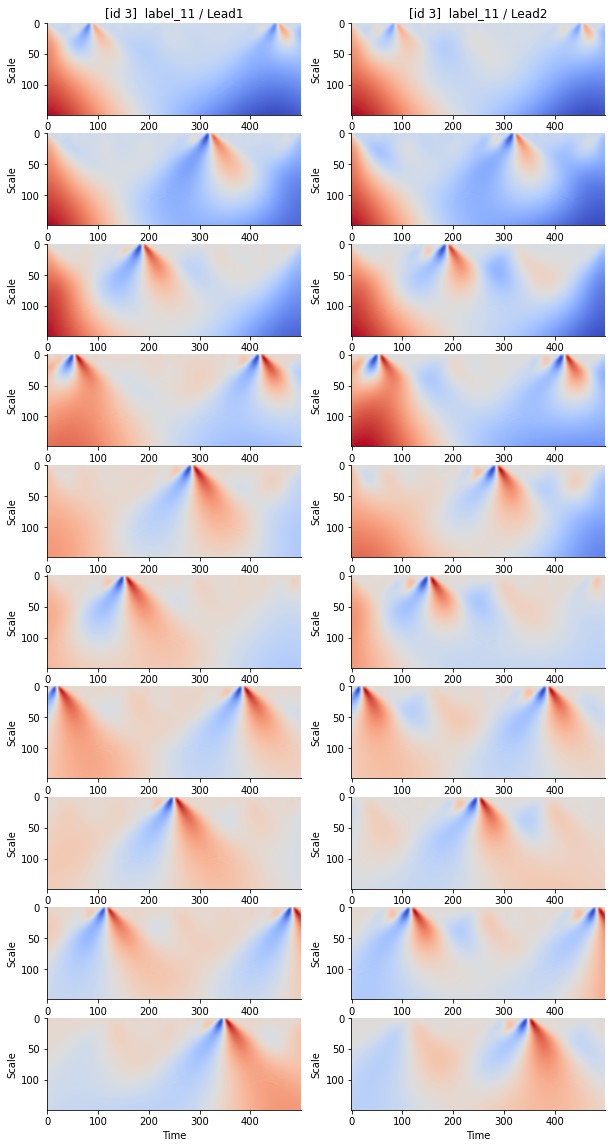

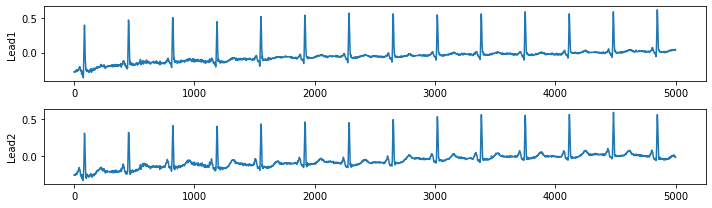

In [18]:
cwt_plot_500(wavelet='gaus1', label='label_11')

['10']


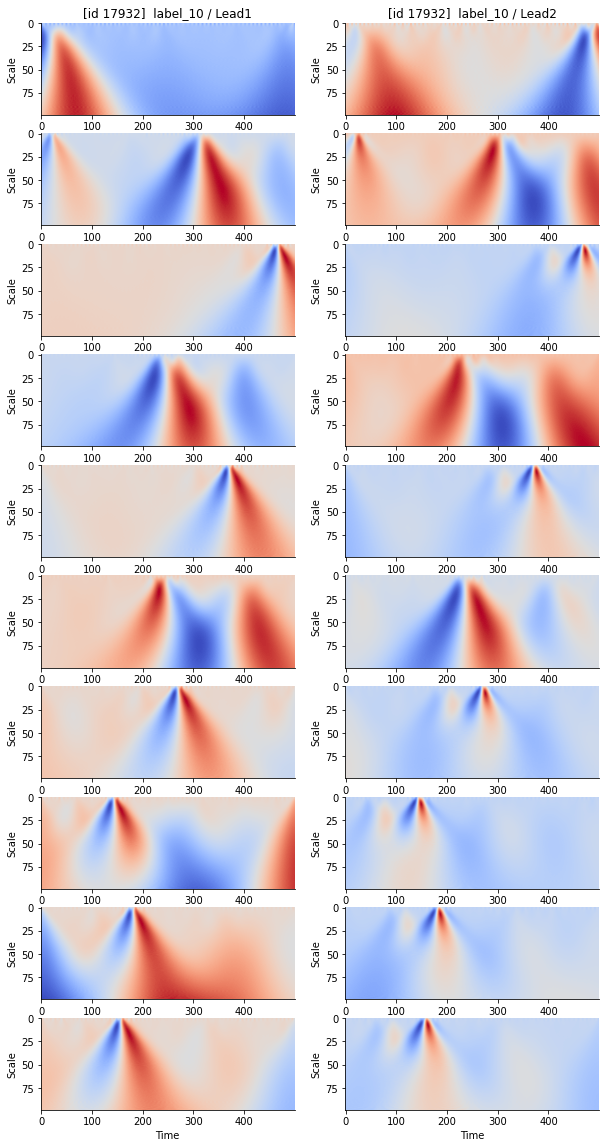

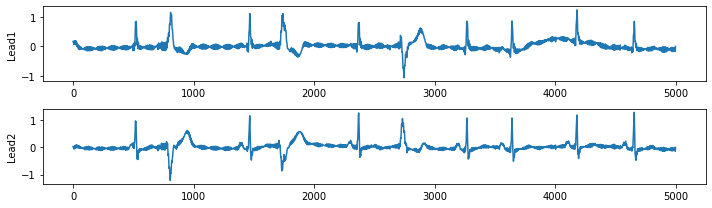

In [17]:
cwt_plot_500(scale=np.arange(1,100), wavelet='gaus1', label='label_10', order=3)

## Eliminate baseline wandering

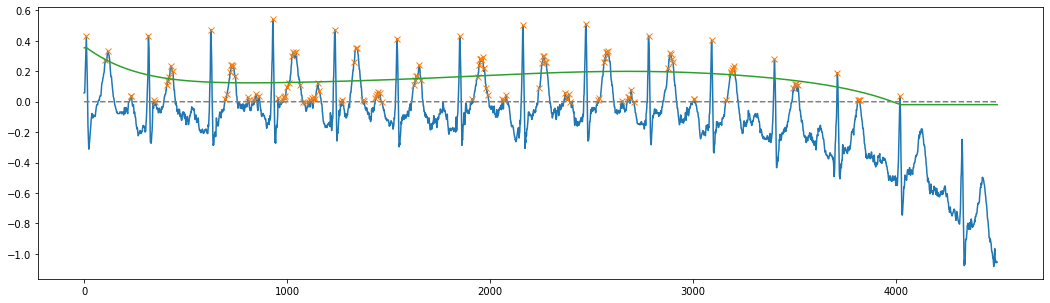

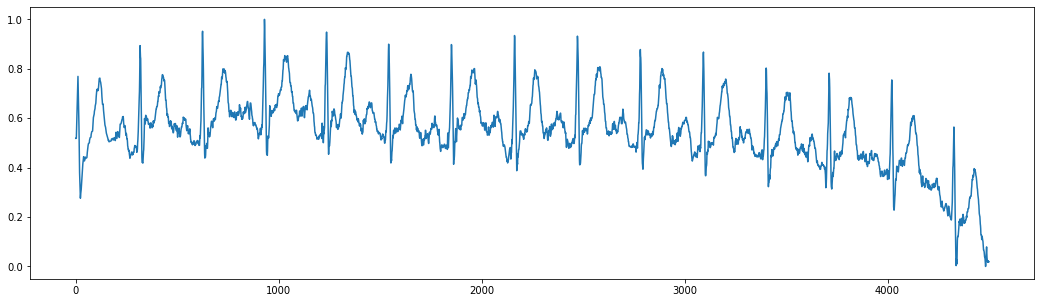

In [374]:
x = train_data.list_recording[16231][1][:-500]
h = (2*x.max()+1*x.min())/3
peaks, _ = sc.signal.find_peaks(x, height=h)
# peaks, _ = sc.signal.find_peaks(x, height=h)
poly = np.poly1d(np.polyfit(peaks, x[peaks], 7))
poly_line = np.linspace(1, len(x), len(x))


poly_ = poly(poly_line)
poly_[:peaks[0]] = poly_[peaks[0]]
poly_[peaks[-1]:] = poly_[peaks[-1]]

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(poly_line, poly_)
plt.plot([h]*len(x), "--", color="gray")
plt.show()

x1 = x-poly_
x1 =  minmax_scale(x1)
plt.plot(x1)
plt.show()

In [321]:
train_data.list_recording_new[16231] = [x_, x1]

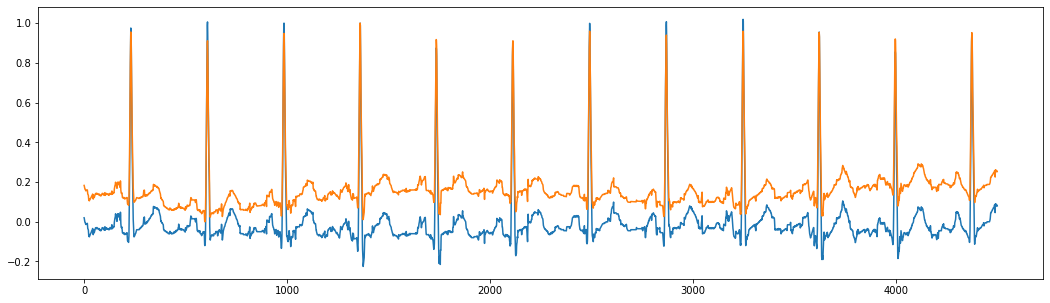

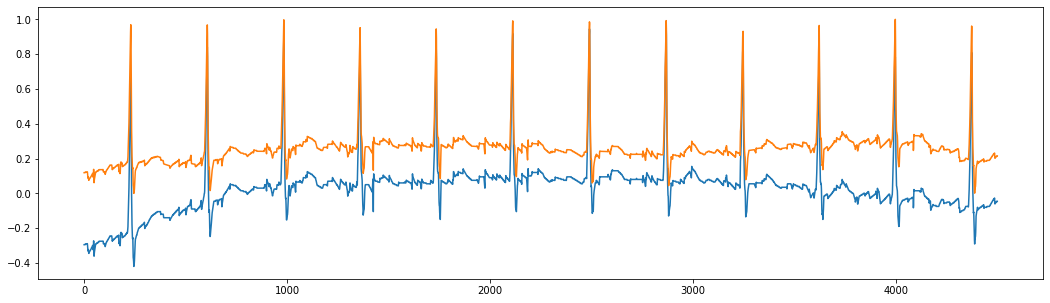

['8', '10']
1893


In [372]:
idx = 0
plt.plot(train_data.list_recording[idx][0][TRIM:-TRIM])
plt.plot(train_data.list_recording_new[idx][0])
plt.show()
plt.plot(train_data.list_recording[idx][1][TRIM:-TRIM])
plt.plot(train_data.list_recording_new[idx][1])
plt.show()
print(train_data.list_labels[idx])
print(train_data.list_id[idx])

In [257]:
def remove_baseline_wander(signal, poly=4, return_poly=False):
    x = signal
    # threshold
    h = (2*x.max()+1*x.min())/3
    # find local maxima over threshold
    peaks, _ = find_peaks(x, height=h)
    # fit into polynomial fuction
    poly = np.poly1d(np.polyfit(peaks, x[peaks], poly))
    poly_line = np.linspace(1, len(x), len(x))
    poly_ = poly(poly_line)
    poly_[:peaks[0]] = poly_[peaks[0]]
    poly_[peaks[-1]:] = poly_[peaks[-1]]
    # subtract polynomial function
    x_ = x - poly_
    # minmax scaling
    x_ -= x_.min()
    x_ /= x_.max()
    if return_poly:
        return x_, poly_
    else:
        return x_

In [ ]:
TRIM = 250
train_data.list_recording_new = [[]]*len(train_data)
for i in range(len(train_data)):
    signal = train_data.list_recording[i]
    try:
        x0 = remove_baseline_wander(signal[0][TRIM:-TRIM], poly=5)
        x1 = remove_baseline_wander(signal[1][TRIM:-TRIM], poly=5)
        train_data.list_recording_new[i] = [x0, x1]
    except TypeError:
        print(i)

In [324]:
for idx in range(len(train_data)):
    if train_data.list_recording_new[idx]==[]:
        print(idx)

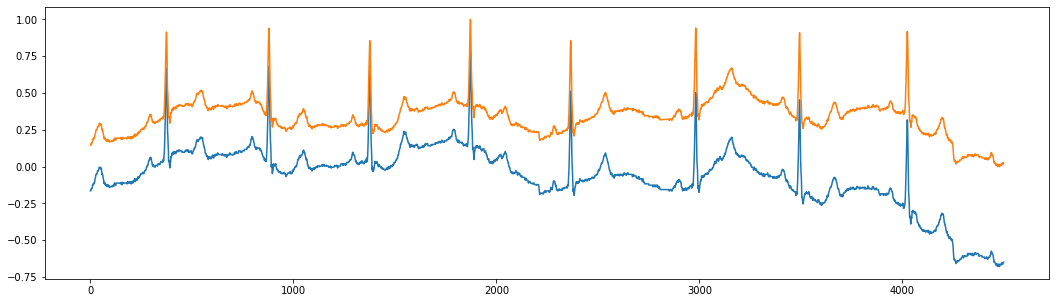

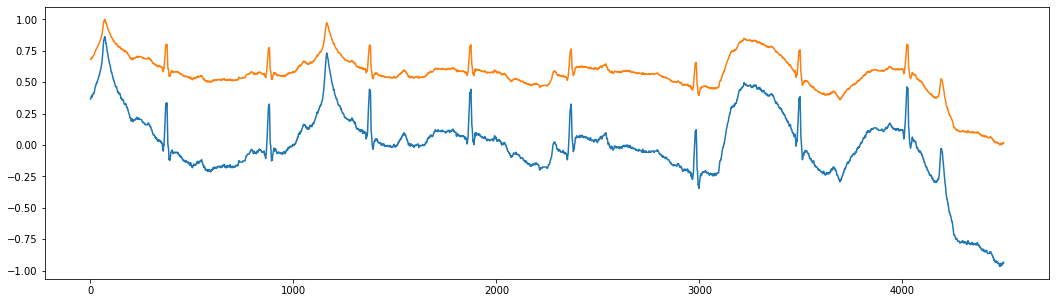

['6', '7']
4404


In [269]:
idx = 5689
plt.plot(train_data.list_recording[idx][0][TRIM:-TRIM])
plt.plot(train_data.list_recording_new[idx][0])
plt.show()
plt.plot(train_data.list_recording[idx][1][TRIM:-TRIM])
plt.plot(train_data.list_recording_new[idx][1])
plt.show()
print(train_data.list_labels[idx])
print(train_data.list_id[idx])

In [ ]:
test_data.list_recording_new = [[]]*len(test_data)
for i in range(len(test_data)):
    signal = test_data.list_recording[i]
    try:
        x0 = remove_baseline_wander(signal[0][TRIM:-TRIM], poly=5)
        x1 = remove_baseline_wander(signal[1][TRIM:-TRIM], poly=5)
        test_data.list_recording_new[i] = [x0, x1]
    except TypeError:
        print(i)

In [309]:
for idx in range(len(test_data)):
    if test_data.list_recording_new[idx]==[]:
        print(idx)

In [295]:
x0 = remove_baseline_wander(test_data.list_recording[4168][0][:-500], poly=5)
x1 = x_ #remove_baseline_wander(test_data.list_recording[4168][1][:-500], poly=5)
test_data.list_recording_new[4168] = [x0, x1]

In [277]:
signal

array([[-0.005, -0.005, -0.005, ..., -0.01 , -0.01 , -0.01 ],
       [-0.115, -0.115, -0.115, ...,  0.02 ,  0.02 ,  0.02 ]],
      dtype=float32)

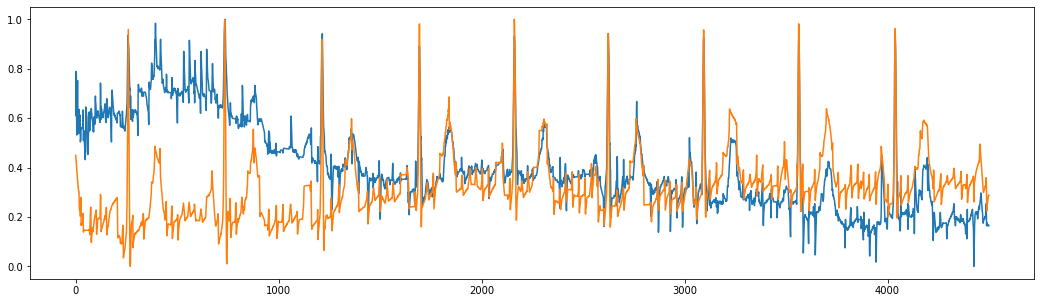

In [302]:
plt.plot(test_data.list_recording_new[-1][0])
plt.plot(test_data.list_recording_new[-1][1])
plt.show()

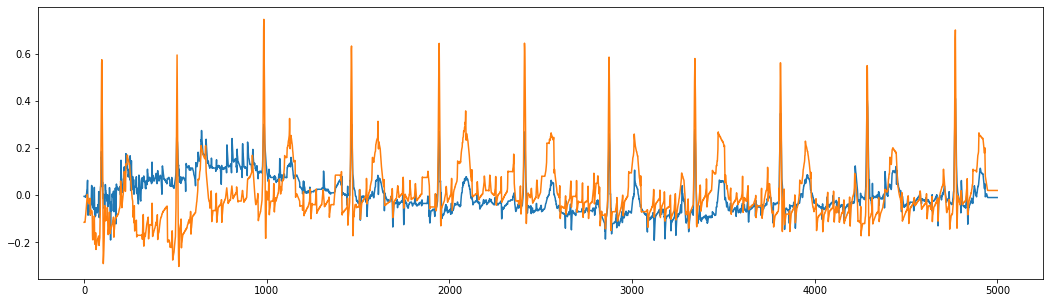

In [300]:
plt.plot(signal[0])
plt.plot(signal[1])
plt.show()

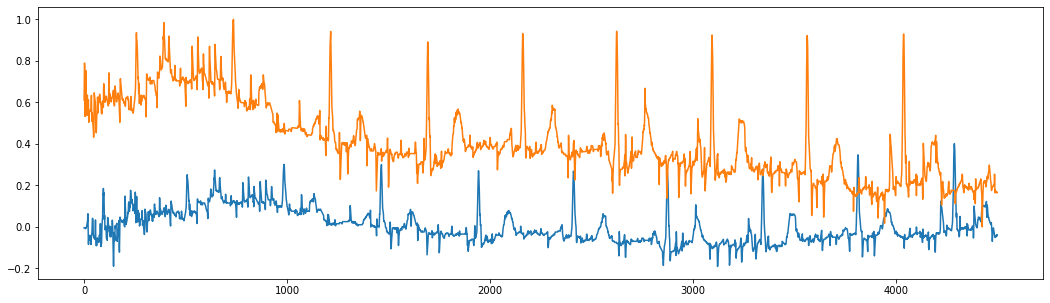

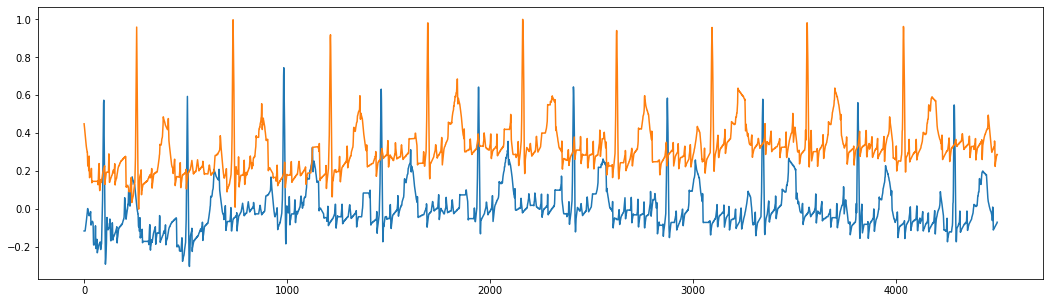

6643


In [307]:
idx = -1
plt.plot(test_data.list_recording[idx][0][:-500])
plt.plot(test_data.list_recording_new[idx][0])
plt.show()
plt.plot(test_data.list_recording[idx][1][:-500])
plt.plot(test_data.list_recording_new[idx][1])
plt.show()
print(test_data.list_id[idx])

In [153]:
train_data.list_recording_new[:5]

[[array([0.26536505, 0.2646063 , 0.26384955, ..., 0.05514029, 0.05443379,
         0.05372538]),
  array([0.45869284, 0.4574906 , 0.4562908 , ..., 0.00204809, 0.00102531,
         0.        ])],
 [array([0.35131599, 0.35045302, 0.34959185, ..., 0.01718859, 0.01670604,
         0.01622234]),
  array([0.72229999, 0.72061946, 0.71894247, ..., 0.12022135, 0.1194223 ,
         0.11862119])],
 [array([0.09079457, 0.09101318, 0.0912315 , ..., 0.09574077, 0.09557193,
         0.09540277]),
  array([0.23915381, 0.23890064, 0.23864809, ..., 0.29656577, 0.29640313,
         0.29623996])],
 [],
 []]

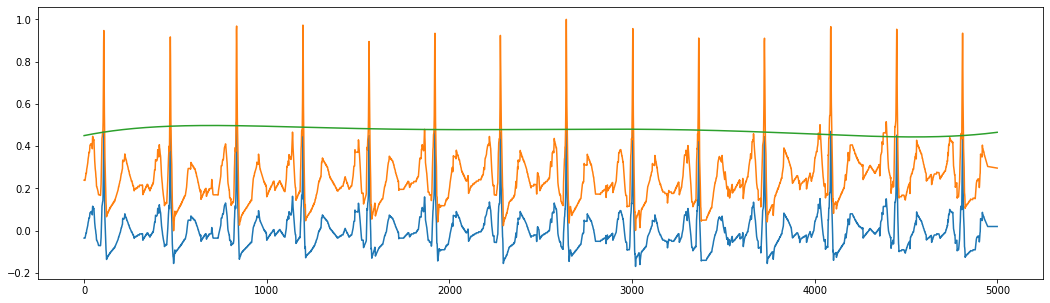

In [154]:
idx = 2
lead = 1
plt.plot(train_data.list_recording[idx][lead])
plt.plot(train_data.list_recording_new[idx][lead])
# peaks = [110, 475, 838, 1201, 1560, 1563, 1924, 2283, 2643, 3006, 3368, 3728, 4091, 4452, 4813]
# plt.plot(peaks, train_data.list_recording[idx][lead][peaks], "x")
plt.plot(list_poly[idx][lead])
plt.show()

In [394]:
with open(DIR+'data/train_data_new.pkl', 'wb') as f:
    pickle.dump(train_data, f, pickle.HIGHEST_PROTOCOL)
with open(DIR+'data/test_data_new.pkl', 'wb') as f:
    pickle.dump(test_data, f, pickle.HIGHEST_PROTOCOL)

## Save files as pytorch tensor

In [326]:
import torch

In [389]:
class Dataset_ECG_pytorch(torch.utils.data.Dataset):
    """
        Build ECG dataset
    """
    def __init__(self, list_id, list_age, list_sex, list_recording, list_labels_oh=None, num_classes=12):
        """
            dataset을 읽어들여 id, age, sex, recording, labels를 저장한 list를 만들어 줍니다.
        """
        self.sample_id = torch.tensor(list_id)
        self.sample_age = torch.FloatTensor(list_age)
        self.sample_sex = torch.FloatTensor(list_sex)
        self.sample_recording = torch.FloatTensor(list_recording)

        length = len(list_id)
        assert length==len(self.sample_id)
        assert length==len(self.sample_age)
        assert length==len(self.sample_sex)
        assert length==len(self.sample_recording)

        self.train = False
        if not list_labels_oh is None:
            self.train = True
            self.sample_labels = torch.FloatTensor(list_labels_oh)
            assert length==len(self.sample_labels)
        
        self.num_samples = length
        
        print(f'Loaded {self.num_samples} samples...')

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        result = {
            "id": self.sample_id[idx],
            "age": self.sample_age[idx],
            "sex": self.sample_sex[idx],
            "recording": self.sample_recording[idx],
        }
        if self.train:
            result['labels'] = self.sample_labels[idx]
        return result

In [390]:
train_data_torch = Dataset_ECG_pytorch(
    list_id = train_data.list_id,
    list_age = train_data.list_age,
    list_sex = train_data.list_sex,
    list_recording = train_data.list_recording_new,
    list_labels_oh = train_data.list_labels_oh,
)

Loaded 19212 samples...


In [392]:
test_data_torch = Dataset_ECG_pytorch(
    list_id = test_data.list_id,
    list_age = test_data.list_age,
    list_sex = test_data.list_sex,
    list_recording = test_data.list_recording_new,
)

Loaded 7389 samples...


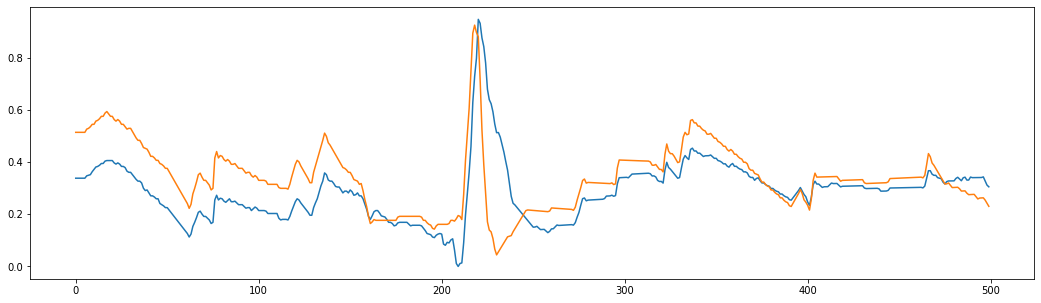

In [348]:
plt.plot(test_data_torch.sample_recording[4168][0][:500])
plt.plot(test_data_torch.sample_recording[4168][1][:500])
plt.show()

In [393]:
with open(DIR+'data/train_data_torch.pkl', 'wb') as f:
    pickle.dump(train_data_torch, f, pickle.HIGHEST_PROTOCOL)
with open(DIR+'data/test_data_torch.pkl', 'wb') as f:
    pickle.dump(test_data_torch, f, pickle.HIGHEST_PROTOCOL)

In [342]:
train_data_torch[0]

{'age': tensor(65.),
 'id': tensor(1893),
 'labels': tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]),
 'recording': tensor([[0.1830, 0.1797, 0.1741,  ..., 0.2550, 0.2558, 0.2526],
         [0.1188, 0.1188, 0.1188,  ..., 0.2140, 0.2167, 0.2158]],
        dtype=torch.float64),
 'sex': tensor(1)}

In [346]:
test_data_torch[1]

{'age': tensor(61.),
 'id': tensor(7360),
 'recording': tensor([[0.1154, 0.1196, 0.1196,  ..., 0.1400, 0.1432, 0.1421],
         [0.7522, 0.7569, 0.7569,  ..., 0.5710, 0.5746, 0.5734]],
        dtype=torch.float64),
 'sex': tensor(1)}

## Cut in 500

In [1]:
import pickle
import numpy as np
base_dir = '/content/drive/MyDrive/Programming/CreativeProject/3_ecg/'
with open(base_dir+'data/test_preprocessed_dict.pkl', 'rb') as f:
    test_data = pickle.load(f)
with open(base_dir+'data/train_preprocessed_dict.pkl', 'rb') as f:
    train_data = pickle.load(f)

In [19]:
train_data_500 = {
    'id': [],
    'recording': [],
    'age': [],
    'sex': [],
    'labels': [],
}
sampling = 500
nps = int(len(train_data['recording'][0][0])/sampling) # n per sample
print(f'Number per sample: {nps}')
for i in range(len(train_data['id'])):
    for j in range(nps):
        train_data_500['id'].append(train_data['id'][i])
        train_data_500['age'].append(train_data['age'][i])
        train_data_500['sex'].append(train_data['sex'][i])
        train_data_500['labels'].append(train_data['labels'][i])
        x0 = train_data['recording'][i][0][sampling*j:sampling*(j+1)]
        x1 = train_data['recording'][i][1][sampling*j:sampling*(j+1)]
        train_data_500['recording'].append([x0, x1])

Number per sample: 9


In [5]:
len(train_data_500['id'])

172908

In [7]:
len(train_data['id'])

19212

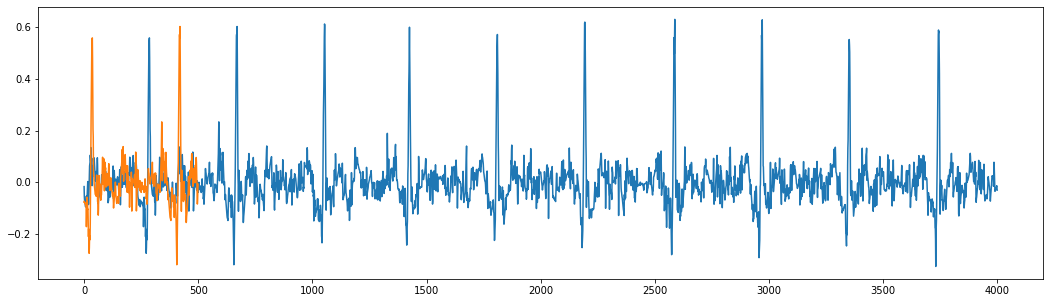

5450
5450


In [29]:
idx = 5
idx9 = 5*9+1
plt.plot(train_data['recording'][idx][0][250:-250])
plt.plot(train_data_500['recording'][idx9][0])
plt.show()
print(train_data['id'][idx])
print(train_data_500['id'][idx9])

In [32]:
test_data_500 = {
    'id': [],
    'recording': [],
    'age': [],
    'sex': [],
}
sampling = 500
nps = int(len(test_data['recording'][0][0])/sampling) # n per sample
print(f'Number per sample: {nps}')
for i in range(len(test_data['id'])):
    for j in range(nps):
        test_data_500['id'].append(test_data['id'][i])
        test_data_500['age'].append(test_data['age'][i])
        test_data_500['sex'].append(test_data['sex'][i])
        x0 = test_data['recording'][i][0][sampling*j:sampling*(j+1)]
        x1 = test_data['recording'][i][1][sampling*j:sampling*(j+1)]
        test_data_500['recording'].append([x0, x1])

Number per sample: 9


In [34]:
test_data_500.keys()

dict_keys(['id', 'recording', 'age', 'sex'])

In [35]:
len(test_data_500['id'])

66501

In [36]:
with open(DIR+'data/train_preprocessed_dict_500.pkl', 'wb') as f:
    pickle.dump(train_data_500, f, pickle.HIGHEST_PROTOCOL)
with open(DIR+'data/test_preprocessed_dict_500.pkl', 'wb') as f:
    pickle.dump(test_data_500, f, pickle.HIGHEST_PROTOCOL)